## Stochastic Process
Un proceso estocástico es una sucesión de variables aleatorias que evolucionan en función del tiempo. Estos procesos son fundamentales en la teoría de la probabilidad y las estadísticas, y son utilizados para modelar sistemas que evolucionan con el tiempo de manera incierta. Los ejemplos incluyen el movimiento de partículas en un fluido, las fluctuaciones en los precios de las acciones, y la propagación de enfermedades en una población.
    
        X(t) = f(t, W(t)) donde f es alguna función y W(t) es un proceso de Wiener.


## Wiener Process

El proceso de Wiener es un tipo de proceso estocástico que se caracteriza por su continuidad en el tiempo y su independencia en los incrementos. Es un proceso de tiempo continuo, lo que significa que se puede observar en cualquier punto en el tiempo. Los incrementos del proceso de Wiener son normales (gaussianos), lo que significa que la diferencia entre dos puntos en el tiempo sigue una distribución normal.

Sea W(t) un proceso estocástico que tiene las siguientes propiedades:

- W(0) = 0
- Los incrementos son independientes: W(t + s) - W(s) es independiente de W(u) para todo u ≤ s.
- Los incrementos son normales: W(t + s) - W(s) se distribuye normalmente con media 0 y varianza t.
- El proceso tiene trayectorias continuas: para cada ω en el espacio de muestreo, la función t ↦ W(t)(ω) es continua.

La ecuación diferencial estocástica (SDE) que define el proceso de Wiener es:

        dW(t) = ε(t)√dt, donde ε(t) es una variable aleatoria con una distribución normal estándar.

## Proceso de Ito

El proceso de Ito es una extensión del proceso de Wiener que incluye un término de deriva que puede ser una función del tiempo y del proceso en sí. Se define por la siguiente ecuación diferencial estocástica:

        dX(t) = μ(t, X(t))dt + σ(t, X(t))dW(t), donde μ(t, X(t)) es la función de deriva y σ(t, X(t)) es la función de difusión.


## Brownian Motion
Se trata de un tipo de proceso de Wiener y por lo tanto, se define por las mismas propiedades y ecuaciones. En finanzas, el movimiento browniano se utiliza para modelar la evolución de los precios de los activos en el tiempo. Por ejemplo, el modelo de Black-Scholes para la valoración de opciones asume que los rendimientos logarítmicos de un activo siguen un movimiento browniano geométrico, que se puede escribir como:

        dS/S = μdt + σdW(t)

Generalmente se conoce 'μ' como difusión y 'σ'  como deriva

El movimiento browniano también puede ser expresado como un proceso de Ito. Sea S_0 el precio actual de un activo, podemos calcular la función de densidad asociada al desarrollo del precio del activo como un proceso de movimiento Browniano.

        S(t) = S_0 * exp((μ - 0.5*σ^2)t + σW(t))
        dS(t) = μS(t)dt + σS(t)dW(t), donde W(t) es un proceso de Wiener.

En la versión discretizada del proceso de Ito, el movimiento browniano se puede expresar como:

        S(t+h) - S(t) = μS(t)h + σS(t)B(h), donde B(h) es una variable aleatoria normalmente distribuida.

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from trading.ml.generators.dataset_generator import DatasetGenerator # local module
import pandas as pd

In [66]:
def brownian_motion(N, T, h):
    dt = T/N
    dW = h * np.sqrt(dt) * np.random.normal(size=N)
    W = np.cumsum(dW)
    W = np.insert(W, 0, 0)
    return W

/tmp/ipykernel_57563/2723076152.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('gray')


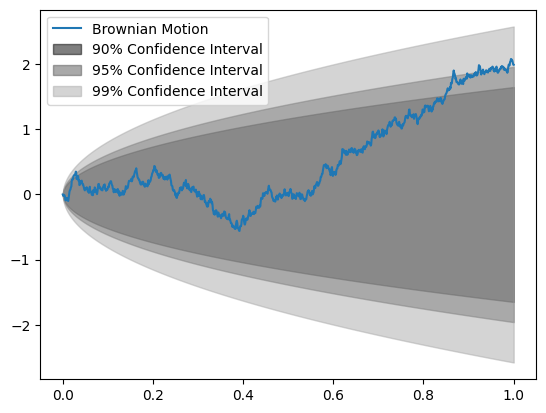

In [67]:
N = 1000
T = 1.0
h = 1.0
W = brownian_motion(N, T, h)
t = np.linspace(0, T, N+1) 

# Define a grayscale colormap
cmap = plt.cm.get_cmap('gray')

# Calcular las curvas de intervalo de confianza
plt.plot(t, W, label='Brownian Motion')
for i,z in enumerate([1.65, 1.96, 2.58]):
    upper_bound = z*np.sqrt(t)
    lower_bound = -z*np.sqrt(t)
    intensity = i / (len([1.65, 1.96, 2.58]))
    color = cmap(intensity)
    plt.fill_between(t, lower_bound, upper_bound, color=color, alpha=0.5, label=['90','95','99'][i]+'% Confidence Interval')
plt.legend()
plt.show()

In [69]:
data_generator = DatasetGenerator()
data_ = pd.read_csv('btc_daily.csv')
data_ = data_[['timestamp','date','open','high','low','close']]

In [70]:
# Definir el movimiento browniano geométrico
def geometric_brownian_motion(T, mu, sigma, S0, dt):
    N = round(T/dt)
    t = np.linspace(0, T, N)
    W = np.random.standard_normal(size = N) 
    W = np.cumsum(W)*np.sqrt(dt) # standard brownian motion
    X = (mu-0.5*sigma**2)*t + sigma*W 
    S = S0*np.exp(X) # geometric brownian motion
    return S

In [71]:
# Calcular el rendimiento logarítmico
returns = np.log(data_['close'] / data_['close'].shift(1))

# Media y desviación std - 'drift' and 'diffusion'
mu = returns.mean()
sigma = returns.std()

T = 1
dt = 1/returns.shape[0]
S0 = data_['close'].iloc[-1]

/tmp/ipykernel_57563/3612974206.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Greens')


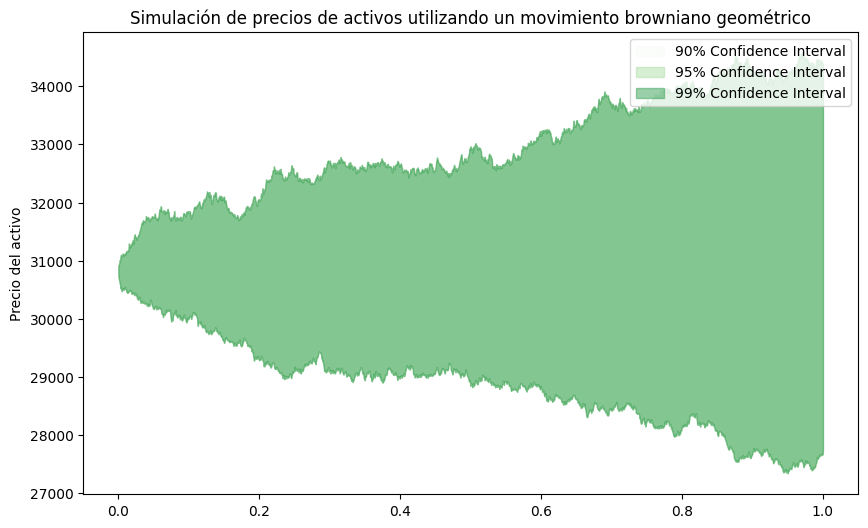

In [72]:
num_simulations = 100
simulations = np.zeros((num_simulations, round(T/dt)))
for i in range(num_simulations):
    simulations[i] = geometric_brownian_motion(T, mu, sigma, S0, dt)

# Graficar las trayectorias y los intervalos de confianza
plt.figure(figsize=(10,6))
# plt.plot(simulations.T, color='blue', alpha=0.5)

# Define a grayscale colormap
cmap = plt.cm.get_cmap('Greens')

# Calcular y graficar los intervalos de confianza
t = np.linspace(0, T, round(T/dt))
for i,z in enumerate([1.65, 1.96, 2.58]):
    upper_percentile = 50 + z*100/2
    lower_percentile = 50 - z*100/2
    upper_bound = np.percentile(simulations, np.clip(upper_percentile, 0, 100), axis=0)
    lower_bound = np.percentile(simulations, np.clip(lower_percentile, 0, 100), axis=0)
    intensity = i / (len([1.65, 1.96, 2.58]))
    color = cmap(intensity)

    plt.fill_between(t, lower_bound, upper_bound, color=color, alpha=0.5, label=['90','95','99'][i]+'% Confidence Interval')

plt.ylabel('Precio del activo')
plt.title('Simulación de precios de activos utilizando un movimiento browniano geométrico')
plt.legend()
plt.show()